*Copyright 2024 Jaeyoung Chun*

You may not make copies of this and use or distribute it for any purpose.

# Compute xG

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch

## Read Data

In [2]:
df_shots = pd.read_parquet("./data/data-epl-shots.parquet")

In [3]:
df_shots

,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,...,block_save_block,shot_deflected,player_off_permanent,goalkeeper_success_in_play,shot_follows_dribble,goalkeeper_lost_out,half_start_late_video_start,goalkeeper_lost_in_play,goalkeeper_penalty_saved_to_post,goalkeeper_saved_to_post
3149,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3150,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3151,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3152,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3153,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443018,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1443019,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1443020,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1443021,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


## Expand Coordinates

In [4]:
df_shots.location

3149       [107.1, 26.6]
3150       [113.7, 54.0]
3151       [115.7, 50.5]
3152       [113.9, 38.6]
3153        [96.7, 47.2]
               ...      
1443018     [78.2, 38.9]
1443019    [113.8, 33.3]
1443020     [96.6, 24.7]
1443021    [109.7, 25.1]
1443022    [111.5, 43.0]
Name: location, Length: 10837, dtype: object

In [5]:
# from [x,y] to two columns, `shot_x` and `shot_y`
df_shots[ ["shot_x", "shot_y"] ] = df_shots.location.to_list()

In [6]:
# drop the old one
df_shots.drop(columns=["location"], inplace=True)

In [7]:
df_shots

,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,...,player_off_permanent,goalkeeper_success_in_play,shot_follows_dribble,goalkeeper_lost_out,half_start_late_video_start,goalkeeper_lost_in_play,goalkeeper_penalty_saved_to_post,goalkeeper_saved_to_post,shot_x,shot_y
3149,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,107.1,26.6
3150,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,113.7,54.0
3151,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,115.7,50.5
3152,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,113.9,38.6
3153,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,96.7,47.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443018,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,78.2,38.9
1443019,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,113.8,33.3
1443020,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,96.6,24.7
1443021,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,109.7,25.1


## Shot Distance

In [8]:
gx = 120
gy1 = 36
gy2 = 44
gy = gy1 + (gy2 - gy1) / 2

In [9]:
data = pd.DataFrame(index=df_shots.index)

In [10]:
data

""
3149
3150
3151
3152
3153
...
1443018
1443019
1443020
1443021


In [11]:
data["x"] = gx - df_shots.shot_x

In [12]:
data["y"] = np.abs(gy - df_shots.shot_y)

$$
distance = \sqrt{x^2 + y^2}
$$

In [13]:
data["distance"] = np.sqrt(data.x ** 2 + data.y ** 2)

In [14]:
data

,x,y,distance
3149,12.9,13.4,18.600269
3150,6.3,14.0,15.352199
3151,4.3,10.5,11.346365
3152,6.1,1.4,6.258594
3153,23.3,7.2,24.387087
...,...,...,...
1443018,41.8,1.1,41.814471
1443019,6.2,6.7,9.128527
1443020,23.4,15.3,27.958004
1443021,10.3,14.9,18.113531


## Shot Angle

In [15]:
goal_width = gy2 - gy1
goal_width

8

$$
\theta = arctan(\frac{x \times w}{x^2 + y^2 - (\frac{w}{2})^2})
$$

In [16]:
np.arctan((data.x * goal_width) / (data.x ** 2 + data.y ** 2 - (goal_width / 2) ** 2))

3149       0.303118
3150       0.225512
3151       0.296154
3152       1.127515
3153       0.311593
             ...   
1443018    0.190676
1443019    0.634915
1443020    0.239794
1443021    0.258128
1443022    0.806033
Length: 10837, dtype: float64

In [17]:
data["angle"] = np.arctan((data.x * goal_width) / (data.x ** 2 + data.y ** 2 - (goal_width / 2) ** 2))

In [18]:
# convert to degree
data["angle"] = data["angle"] * 180 / np.pi

In [19]:
# handle negative degrees
data.angle = data.angle.apply(lambda angle: angle if angle >= 0 else angle + 180)

In [20]:
data

,x,y,distance,angle
3149,12.9,13.4,18.600269,17.367371
3150,6.3,14.0,15.352199,12.920882
3151,4.3,10.5,11.346365,16.968355
3152,6.1,1.4,6.258594,64.601862
3153,23.3,7.2,24.387087,17.852948
...,...,...,...,...
1443018,41.8,1.1,41.814471,10.924958
1443019,6.2,6.7,9.128527,36.377965
1443020,23.4,15.3,27.958004,13.739171
1443021,10.3,14.9,18.113531,14.789639


## Goal

In [21]:
data["goal"] = (df_shots.shot_outcome == "Goal").astype(int)

## Distance and Goal

### Visualization

In [22]:
data.loc[:, ["distance", "goal"]]

,distance,goal
3149,18.600269,0
3150,15.352199,0
3151,11.346365,0
3152,6.258594,0
3153,24.387087,0
...,...,...
1443018,41.814471,0
1443019,9.128527,0
1443020,27.958004,0
1443021,18.113531,0


In [23]:
# sort by distance
data.loc[:, ["distance", "goal"]].sort_values(by="distance")

,distance,goal
487938,0.921954,1
347577,1.140175,1
1230258,1.529706,0
246250,1.769181,1
691843,1.843909,1
...,...,...
1412896,72.562318,0
432955,72.568106,0
508510,72.800275,0
256414,78.487260,0


In [24]:
colors = { 0: "silver", 1: "yellow" }

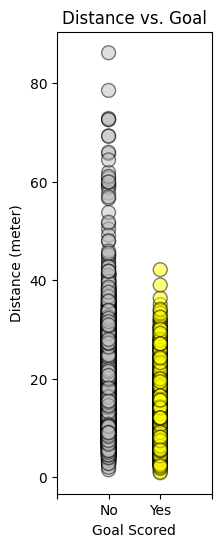

In [25]:
fig, ax = plt.subplots(figsize=(2, 6))

ax.scatter(
    data.goal, data.distance,
    marker="o", color=data.goal.apply(lambda x: colors[x]), edgecolor="black", alpha=0.5,
    s=100
)

ax.set_xlabel("Goal Scored")
ax.set_ylabel("Distance (meter)")

ax.set_xticks([-1, 0, 1, 2], labels=["", "No", "Yes", ""])
ax.set_title("Distance vs. Goal")

plt.show()

### Compute xG

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [27]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [28]:
model_distance = smf.glm(formula='goal ~ distance', data=data, family=sm.families.Binomial())
model_distance = model_distance.fit()

In [29]:
model_distance.params

Intercept   -0.228784
distance    -0.121076
dtype: float64

$$
xG = sigmoid(-0.228784 + (-0.121076) \cdot distance)
$$

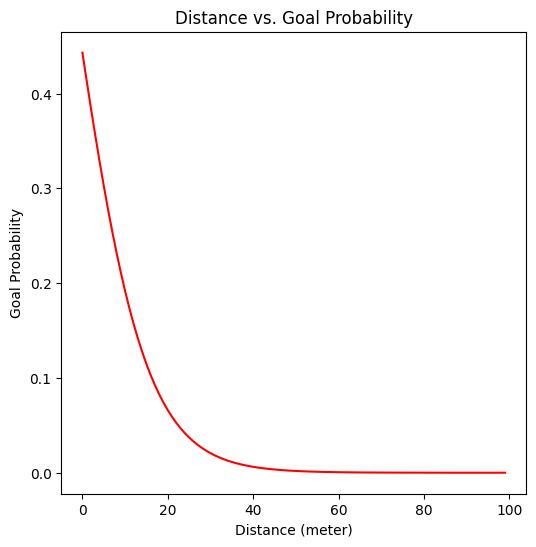

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))

distance = np.arange(0, 100, 1)
y = sigmoid(model_distance.params.Intercept + model_distance.params.distance * distance)
ax.plot(distance, y, c='red')

ax.set_xlabel("Distance (meter)")
ax.set_ylabel("Goal Probability")
ax.set_title("Distance vs. Goal Probability")

plt.show()

## Angle and Goal

### Visualization

In [31]:
data.loc[:, ["angle", "goal"]]

,angle,goal
3149,17.367371,0
3150,12.920882,0
3151,16.968355,0
3152,64.601862,0
3153,17.852948,0
...,...,...
1443018,10.924958,0
1443019,36.377965,0
1443020,13.739171,0
1443021,14.789639,0


In [32]:
# sort by angle
data.loc[:, ["angle", "goal"]].sort_values(by="angle")

,angle,goal
1313707,1.044736,0
283643,1.513607,0
396738,2.608906,0
980688,2.951538,0
957848,2.954930,0
...,...,...
413850,148.836481,1
347577,149.093597,1
314256,151.423716,1
487938,159.713824,1


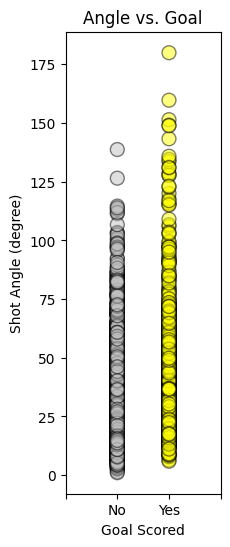

In [33]:
fig, ax = plt.subplots(figsize=(2, 6))

ax.scatter(
    data.goal, data.angle,
    marker="o", color=data.goal.apply(lambda x: colors[x]), edgecolor="black", alpha=0.5,
    s=100
)

ax.set_xlabel("Goal Scored")
ax.set_ylabel("Shot Angle (degree)")

ax.set_xticks([-1, 0, 1, 2], labels=["", "No", "Yes", ""])
ax.set_title("Angle vs. Goal")

plt.show()

### Compute xG

In [34]:
model_angle = smf.glm(
    formula="goal ~ angle",
    data=data,
    family=sm.families.Binomial()
)

model_angle = model_angle.fit()

In [35]:
model_angle.params

Intercept   -3.416192
angle        0.041305
dtype: float64

$$
xG = sigmoid(-3.416192 + (0.041305) \cdot angle)
$$

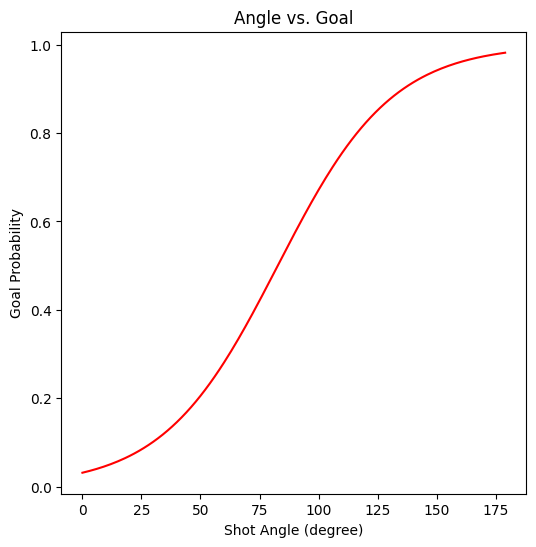

In [36]:
fig, ax = plt.subplots(figsize=(6, 6))

angle = np.arange(0, 180)
y = sigmoid(model_angle.params.Intercept + model_angle.params.angle * angle)
ax.plot(angle, y, c="red")

ax.set_xlabel("Shot Angle (degree)")
ax.set_ylabel("Goal Probability")
ax.set_title("Angle vs. Goal")

plt.show()

## X, Y, Distance, Angle, and Goal

In [37]:
formula = "goal ~ x + y + distance + angle"

model = smf.glm(
    formula=formula,
    data=data,
    family=sm.families.Binomial()
)
model = model.fit()

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   goal   No. Observations:                10837
Model:                            GLM   Df Residuals:                    10832
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3129.1
Date:                Mon, 15 Jul 2024   Deviance:                       6258.2
Time:                        00:03:05   Pearson chi2:                 1.09e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.06946
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0331      0.217     -4.766      0.000      -1.458      -0.608
x             -0.0639      0.035     -1.839      0.066      -0.132       0.004
y             -0.0702      0.020     -3.445      0.001      -0.110      -0.030
distance      -0.0105      0.040     -0.261      0.794      -0.089       0.068
angle          0.0125      0.003      4.224      0.000       0.007       0.018
==============================================================================
"""

In [39]:
model.params

Intercept   -1.033070
x           -0.063889
y           -0.070248
distance    -0.010458
angle        0.012461
dtype: float64

$$
xG = sigmoid(-1.033070 + (-0.063889) \cdot x + (-0.070248) \cdot y + (-0.010458) \cdot distance + (0.012461) \cdot angle)
$$

In [40]:
data["xg"] = data.apply(
    lambda row: sigmoid(model.params.Intercept + model.params.x * row.x + model.params.y * row.y + model.params.distance * row.distance + model.params.angle * row.angle),
    axis=1
)

In [41]:
data

,x,y,distance,angle,goal,xg
3149,12.9,13.4,18.600269,17.367371,0,0.058598
3150,6.3,14.0,15.352199,12.920882,0,0.081767
3151,4.3,10.5,11.346365,16.968355,0,0.124269
3152,6.1,1.4,6.258594,64.601862,0,0.313977
3153,23.3,7.2,24.387087,17.852948,0,0.044786
...,...,...,...,...,...,...
1443018,41.8,1.1,41.814471,10.924958,0,0.016593
1443019,6.2,6.7,9.128527,36.377965,0,0.176244
1443020,23.4,15.3,27.958004,13.739171,0,0.023567
1443021,10.3,14.9,18.113531,14.789639,0,0.060486


## xG Visualization

### Combine Data

In [42]:
df_xg = df_shots.loc[:,["player", "shot_x", "shot_y"]]

In [43]:
df_xg

,player,shot_x,shot_y
3149,Junior Stanislas,107.1,26.6
3150,Joshua King,113.7,54.0
3151,Riyad Mahrez,115.7,50.5
3152,Joshua King,113.9,38.6
3153,José Leonardo Ulloa,96.7,47.2
...,...,...,...
1443018,Laurent Robert,78.2,38.9
1443019,José Antonio Reyes Calderón,113.8,33.3
1443020,Thierry Henry,96.6,24.7
1443021,Craig Bellamy,109.7,25.1


In [44]:
df_xg["goal"] = data.goal
df_xg["xg"] = data.xg

In [45]:
df_xg

,player,shot_x,shot_y,goal,xg
3149,Junior Stanislas,107.1,26.6,0,0.058598
3150,Joshua King,113.7,54.0,0,0.081767
3151,Riyad Mahrez,115.7,50.5,0,0.124269
3152,Joshua King,113.9,38.6,0,0.313977
3153,José Leonardo Ulloa,96.7,47.2,0,0.044786
...,...,...,...,...,...
1443018,Laurent Robert,78.2,38.9,0,0.016593
1443019,José Antonio Reyes Calderón,113.8,33.3,0,0.176244
1443020,Thierry Henry,96.6,24.7,0,0.023567
1443021,Craig Bellamy,109.7,25.1,0,0.060486


### Five Hundred Shots with xG

In [46]:
# 0=no goal, 1=goal
colors = { 0: "silver", 1: "yellow" }

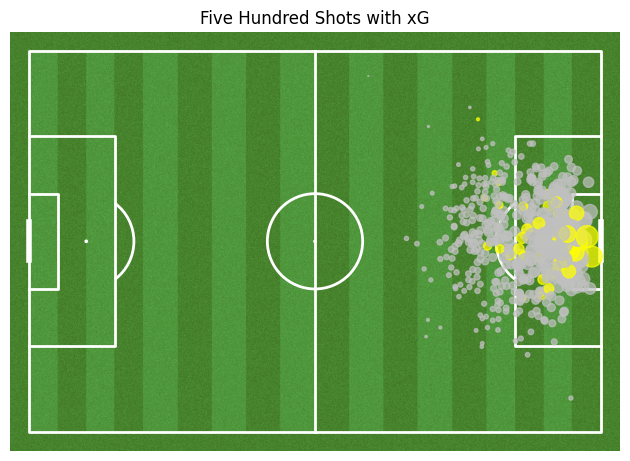

In [47]:
pitch = Pitch(
    pitch_type="statsbomb",
    pitch_color="grass",
    line_color="white",
    stripe=True
)

fig, ax = pitch.draw()

# 500 sampled shots
df_some = df_xg.sample(500, random_state=316)

pitch.scatter(
    df_some.shot_x, df_some.shot_y,
    c=df_some.goal.apply(lambda x: colors[x]),
    alpha=0.7, s=df_some.xg * 500,
    ax=ax
)

ax.set_title("Five Hundred Shots with xG")

plt.show()

### Player-Specific

In [48]:
def draw_xg(player):

    df_xg_player = df_xg[ df_xg.player == player ]

    pitch = Pitch(
        pitch_type="statsbomb",
        pitch_color="grass",
        line_color="white",
        stripe=True
    )
    
    fig, ax = pitch.draw()
    
    pitch.scatter(
        df_xg_player.shot_x , df_xg_player.shot_y,
        c=df_xg_player.goal.apply(lambda x: colors[x]),
        alpha=0.7, s=df_xg_player.xg * 500,
        ax=ax
    )

    ax.set_title(player)
    
    plt.show()

#### Kevin De Bruyne @ Manchester City

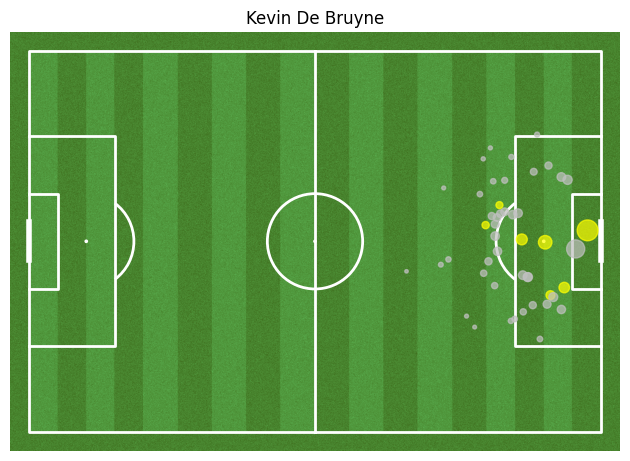

In [49]:
draw_xg("Kevin De Bruyne")

#### Jamie Vardy @ Leicester City

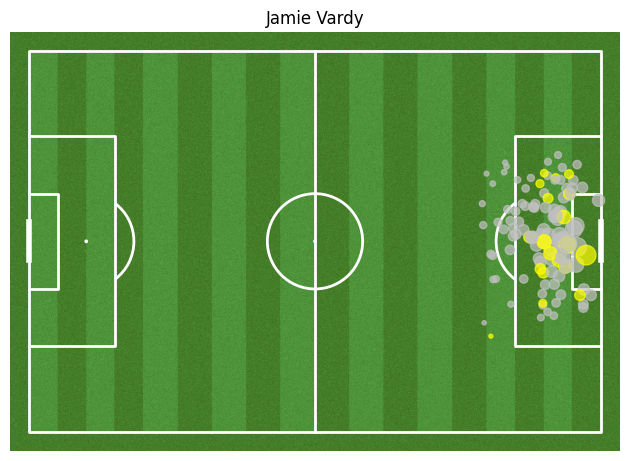

In [50]:
draw_xg("Jamie Vardy")

#### Heung-Min Son @ Tottenham

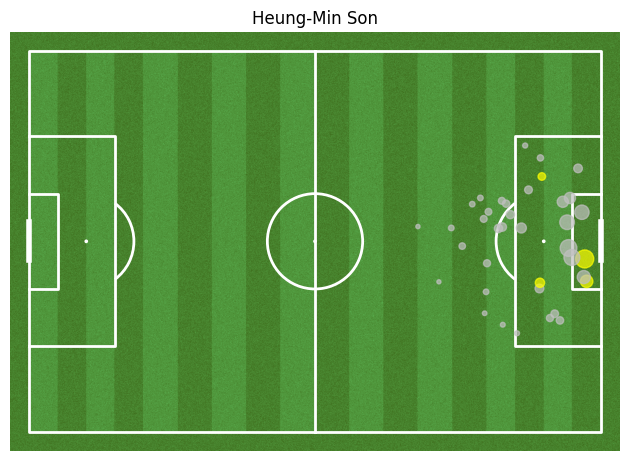

In [51]:
draw_xg("Heung-Min Son")